<a href="https://colab.research.google.com/github/HWP-Wilson/Taxa_de_Mortalidade_SUS/blob/main/Helano_Wilson__projeto_1_bootcamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***

# Análise exploratória sobre a Taxa de Mortalidade - DataSus
helanowilson@ufc.br
***

## INTRODUÇÃO

>Durante as primeiras aulas do bootcamp, da Alura, foram explorados dados  retirados da plataforma do DataSUS. 
      As filtragens limitam extrair um arquivo
   com poucas combinações de variaveis. Se selecionar, por exemplo, taxa de
mortalidade, 
      não é possível selecionar a variável sobre os gastos do 
governo. 
      Assim como não é possível selecionar os dados de processamento e 
atendimento em um mesmo csv. Sendo assim na aula foi selecionado pelos instrutores a variável Custo Total/processamento, mês a mês.

>  Nota-se um 
crescimento nos custos (gráfico 1) ano a ano, justificado até mesmo pelo aumento da 
inflação. A variável Internações (gráfico 2) tambem mostra crescimento, compreensível 
pois a população vem crescendo ao longo dos anos. Outra variável que também
mostra crescimento é o número de óbitos (gráfico 3), entendido pelo simples fato do 
aumento das internações. 


>No entanto, ao se analisar a variável TAXA DE 
MORTALIDADE (gráfico 4) também se observa um crescimento. Se internações e óbitos 
aumentaram, porque a Taxa de Mortalidade está aumentando? Ou seja, óbitos tem aumentado numa velocidade maior que o aumento de internações. 


> **Criar hipóteses que sejam justificativas para esse aumento (Taxa de Mortalidade) de mortes ser maior que o aumento de internações no país é a pergunta que norteia a exploração de dados nesse projeto.**










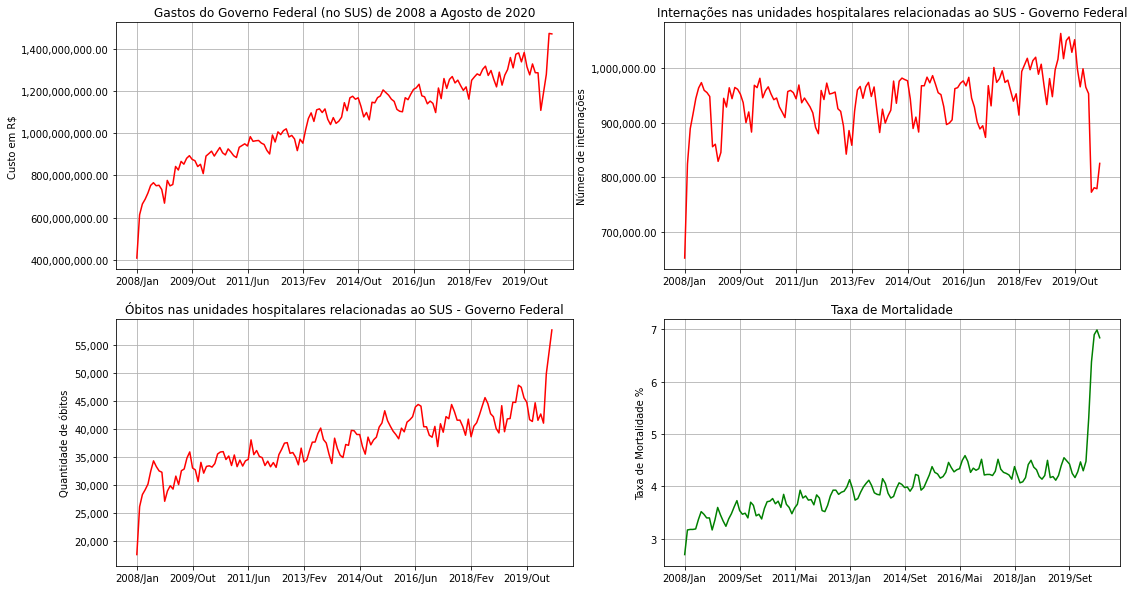

## ANÁLISE INICIAL COM AS VARIÁVEIS: GASTOS, INTERNAÇÕES, ÓBITOS E  TAXA DE MORTALIDADE - Gerando os 4 gráficos utilizados na Introdução. 

In [ ]:
#Importando bibliotecas; baixando arquivos e tratando os dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

%matplotlib inline

In [ ]:
# Montando o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Para todos os arquivos houve uma filtragem das linhas superiores e inferiores( skiprows e skipfooter) dos datasets.
tm = pd.read_csv('/content/drive/MyDrive/Helano_Wilson_Projeto1_bootcampAlura/Taxa de mortalidade por UF.csv', encoding = "ISO-8859-1",
                    skiprows=3, sep =';', skipfooter = 6,thousands= ".", decimal =",")
gastos = pd.read_csv('/content/drive/MyDrive/Helano_Wilson_Projeto1_bootcampAlura/Valor total R$ processamento.csv',encoding = "ISO-8859-1",
                    skiprows=3,sep =';', skipfooter = 11,
                    thousands=".", decimal =",")
óbitos = pd.read_csv('/content/drive/MyDrive/Helano_Wilson_Projeto1_bootcampAlura/Óbitos por UF.csv', encoding = "ISO-8859-1",
                    skiprows=3, sep =';', skipfooter =6,
                    thousands=".", decimal =",")
internações = pd.read_csv('/content/drive/MyDrive/Helano_Wilson_Projeto1_bootcampAlura/Internações por UF.csv', encoding = "ISO-8859-1",
                    skiprows=3, sep =';', skipfooter = 11,
                    thousands=".", decimal =",")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying en

In [ ]:
#Visualização das 5 primeiras linhas do dataset Óbitos:
tm.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1.38,1.36,1.04,1.00,1.20,1.21,1.44,1.50,1.40,1.75,1.28,1.24,1.55,1.24,1.40,1.57,1.16,1.53,1.55,1.44,1.43,1.53,1.74,1.20,1.67,1.22,1.39,1.55,2.05,2.09,2.38,2.37,3.09,2.04,1.97,2.16,2.15,1.79,1.97,...,3.40,3.48,3.05,3.31,2.68,2.71,2.40,3.17,3.03,2.80,2.78,2.69,2.77,3.66,2.60,2.65,2.57,2.87,3.00,3.07,2.81,2.68,3.01,2.86,2.46,3.09,2.74,3.05,3.24,3.03,2.34,2.70,2.65,2.70,3.53,3.97,5.49,5.59,6.44,2.58
1,12 Acre,1.44,3.06,2.01,2.76,2.60,1.76,2.34,2.73,2.28,1.87,1.38,1.60,3.07,2.29,2.23,2.19,2.30,1.84,2.18,1.92,NaN,2.75,2.55,2.57,2.43,1.91,2.74,2.98,2.49,2.56,2.18,2.92,3.21,3.63,2.46,3.08,3.16,2.95,2.31,...,1.98,2.85,3.43,2.22,3.21,3.48,3.06,2.78,2.64,2.73,2.29,2.87,3.76,3.25,2.94,3.79,3.62,4.91,4.30,4.11,3.69,3.63,3.95,3.99,3.47,2.50,3.57,3.55,2.98,2.89,3.67,4.15,3.72,4.81,4.69,5.09,6.02,5.52,NaN,2.86
2,13 Amazonas,1.60,1.91,2.11,2.20,1.87,1.92,1.87,1.81,1.69,1.56,1.27,1.65,2.09,1.52,1.24,2.11,2.07,2.33,2.08,2.38,2.26,1.98,2.10,2.09,2.04,1.63,1.80,1.77,1.85,2.43,1.81,2.30,2.35,1.85,2.09,1.83,2.20,2.66,2.40,...,2.84,3.18,2.84,3.01,3.11,2.95,2.81,2.90,2.83,3.25,3.04,3.39,3.48,3.08,3.10,2.92,3.19,3.07,3.28,3.27,3.22,3.73,3.31,3.34,2.90,3.23,3.22,3.51,3.27,3.42,3.22,3.18,3.86,3.13,4.83,10.40,9.91,6.32,4.64,2.69
3,14 Roraima,1.56,1.16,1.27,1.93,1.28,1.18,1.65,1.35,1.78,2.43,1.20,1.61,2.24,1.88,1.23,1.75,1.31,2.26,1.27,2.08,1.57,2.89,2.01,2.31,2.54,2.57,2.05,1.86,2.24,2.13,2.27,2.11,2.79,3.14,2.87,2.74,2.52,1.62,2.05,...,3.30,2.72,2.52,3.07,2.54,2.38,2.48,2.99,2.83,2.19,2.69,2.94,3.61,3.36,2.78,3.63,2.85,2.98,2.84,3.48,3.95,1.81,3.63,3.59,3.45,3.95,2.44,3.18,2.57,3.26,3.24,2.85,2.81,2.99,3.13,6.07,11.52,6.11,2.60,2.53
4,15 Pará,1.41,1.40,1.53,1.27,1.39,1.45,1.64,1.51,1.73,1.56,1.33,1.45,1.66,1.61,1.57,1.61,1.72,1.58,1.66,1.59,1.74,1.61,1.63,1.47,1.86,1.65,1.58,1.66,1.47,1.68,1.82,1.89,1.74,1.76,1.80,1.65,1.86,1.80,1.85,...,2.44,2.45,2.34,2.36,2.32,2.31,2.10,2.36,2.44,2.49,2.38,2.61,2.44,2.26,2.45,2.31,2.21,2.16,2.43,2.54,2.38,2.41,2.36,2.39,2.61,2.29,2.29,2.45,2.21,2.24,2.47,2.36,2.39,2.40,2.90,4.56,7.03,4.83,5.39,2.11


In [ ]:
#formatando coluna Total (cientifica)
pd.options.display.float_format= "{:.2f}".format

In [ ]:
óbitos.shape

(28, 154)

In [ ]:
óbitos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Columns: 154 entries, Unidade da Federação to Total
dtypes: int64(151), object(3)
memory usage: 33.8+ KB


In [ ]:
óbitos.dtypes

Unidade da Federação    object
2008/Jan                 int64
2008/Fev                 int64
2008/Mar                 int64
2008/Abr                 int64
                         ...  
2020/Mai                 int64
2020/Jun                 int64
2020/Jul                 int64
2020/Ago                object
Total                    int64
Length: 154, dtype: object

In [ ]:
#Filtrando valores nulos
óbitos['2020/Ago'].replace(to_replace=['-'], 
                                value= 0,
                                inplace=True)
óbitos['2020/Ago']

0       421
1         0
2       548
3        85
4      1645
5       149
6       333
7      1076
8       762
9      2200
10      744
11      986
12     2524
13      722
14      564
15     3040
16     5750
17     1102
18     5086
19    13289
20     3792
21     2069
22     3864
23      662
24      771
25     1657
26      978
27    54819
Name: 2020/Ago, dtype: object

In [ ]:
#retirando coluna Total
óbitos.drop(columns='Total', inplace = True)

In [ ]:
colunas_usaveis=óbitos.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


In [ ]:
óbitos_Total = pd.DataFrame(óbitos[colunas_usaveis])

In [ ]:
óbitos_Total.set_index('Unidade da Federação', inplace=True)

In [ ]:
#Mesmo tratamento no dataset da variável óbitos foi feito com as outras variáveis. 
internações['2020/Ago'].replace(to_replace=['-'], 
                                value= 0,
                                inplace=True)
internações['2020/Ago']

0       6541
1          0
2      11822
3       3263
4      30542
5       3055
6       6116
7      24060
8      12589
9      33086
10     12520
11     12002
12     39693
13     11680
14      7066
15     51133
16     86906
17     16089
18     54456
19    175822
20     58111
21     30846
22     52251
23     11253
24     11863
25     22753
26     16438
27    801956
Name: 2020/Ago, dtype: object

In [ ]:
internações.drop(columns='Total', inplace = True)

In [ ]:
colunas_usaveis=internações.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")
colunas_usaveis

['Unidade da Federação',
 '2008/Jan',
 '2008/Fev',
 '2008/Mar',
 '2008/Abr',
 '2008/Mai',
 '2008/Jun',
 '2008/Jul',
 '2008/Ago',
 '2008/Set',
 '2008/Out',
 '2008/Nov',
 '2008/Dez',
 '2009/Jan',
 '2009/Fev',
 '2009/Mar',
 '2009/Abr',
 '2009/Mai',
 '2009/Jun',
 '2009/Jul',
 '2009/Ago',
 '2009/Out',
 '2009/Nov',
 '2009/Dez',
 '2010/Jan',
 '2010/Fev',
 '2010/Mar',
 '2010/Abr',
 '2010/Mai',
 '2010/Jun',
 '2010/Jul',
 '2010/Ago',
 '2010/Set',
 '2010/Out',
 '2010/Nov',
 '2010/Dez',
 '2011/Jan',
 '2011/Fev',
 '2011/Mar',
 '2011/Abr',
 '2011/Mai',
 '2011/Jun',
 '2011/Jul',
 '2011/Ago',
 '2011/Set',
 '2011/Out',
 '2011/Nov',
 '2011/Dez',
 '2012/Jan',
 '2012/Fev',
 '2012/Mar',
 '2012/Abr',
 '2012/Mai',
 '2012/Jun',
 '2012/Jul',
 '2012/Ago',
 '2012/Set',
 '2012/Out',
 '2012/Nov',
 '2012/Dez',
 '2013/Jan',
 '2013/Fev',
 '2013/Mar',
 '2013/Abr',
 '2013/Mai',
 '2013/Jun',
 '2013/Jul',
 '2013/Ago',
 '2013/Set',
 '2013/Out',
 '2013/Nov',
 '2013/Dez',
 '2014/Jan',
 '2014/Fev',
 '2014/Mar',
 '2014/Abr',


In [ ]:
internações_Total = pd.DataFrame(internações[colunas_usaveis])

In [ ]:
internações_Total.set_index('Unidade da Federação', inplace=True)

In [ ]:
# Variável Gastos
gastos = gastos.fillna (0)
gastos.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,1388528.39,2931283.42,1541682.52,1525314.96,1645953.84,1406150.68,3065279.01,3231494.61,3117178.63,3068430.44,2825838.52,2931173.58,2885269.07,2860103.74,3684944.68,3607289.68,3774356.60,3706711.84,3763187.55,3533625.83,3605007.43,3907032.72,3939820.71,3901084.11,3684407.02,3623015.58,3890461.90,4193533.87,4534400.67,4451208.03,4874592.78,4460802.38,5067886.24,4511092.85,4394680.50,4098741.80,4411499.48,3868617.95,4298702.78,...,7948291.63,8438077.45,7656644.83,8047742.98,8657206.23,8150893.68,7507845.13,7998345.94,8893683.69,8867793.32,8871408.50,8501601.67,8315107.81,8525499.78,9177611.46,7368996.38,8835095.43,8328186.64,8408512.77,9351705.82,8143007.97,8949741.77,9630553.15,9581970.31,7891114.05,9792370.67,9170787.53,8816846.71,10024554.15,9675423.70,8085025.66,9221412.18,7493310.88,8092260.11,7273843.63,7652120.28,8725530.68,11152107.08,10285455.78,929129659.72
1,12 Acre,902416.00,1497206.26,1794028.48,1730469.42,1819443.92,1828496.00,2511754.59,2089107.14,2275708.53,1923886.57,1756986.80,2235639.98,2497116.43,2253558.01,2122673.92,2834317.62,2722065.97,2432831.95,2630190.65,2307579.00,-,2826477.02,2170791.18,2541526.44,2491042.33,1954473.90,2389996.38,2654878.60,2844085.21,2336207.19,2125143.06,2430293.67,2377738.44,2184746.84,2468452.90,2516284.54,3051370.08,2629104.42,2485451.79,...,2397512.85,2348760.00,3139155.41,2765062.92,4540084.78,4120228.96,2610454.55,3576595.19,2444567.37,2602434.35,3064163.42,2276236.69,3239474.10,3126429.88,2998865.51,2619709.86,3018048.94,3342614.24,2123426.26,2664654.52,1906429.95,3096439.63,2411628.00,2840630.58,3260153.59,3250722.84,3204998.88,3052745.65,3124802.29,3021521.75,2874871.28,3331803.55,3417691.07,3076003.20,2286642.60,2896340.24,3045245.80,3915193.20,-,420668039.63
2,13 Amazonas,4735529.42,7118990.57,8196635.49,8259378.42,7831399.90,8477273.62,9368858.72,9352532.70,9363099.35,8618318.83,6555549.08,7777645.88,7403068.36,6683346.89,9927781.20,8844511.21,9079035.96,8832894.53,9373395.97,9578326.03,9730634.16,9179252.65,8314648.93,9050439.39,9419460.86,8680178.57,9168055.41,9897901.80,9651362.37,10854599.47,10417122.89,8718347.13,8221592.12,9613977.03,9927574.41,9470661.21,9736750.91,8745259.80,9380112.36,...,12789637.85,14376990.41,14240071.26,13594647.25,14584288.95,13158724.61,13169660.32,13572263.03,13083081.70,14322305.22,14643340.51,14632208.09,14500521.14,14840533.42,14427620.91,15818964.25,16358462.57,15391163.74,14154362.85,16791397.31,14369987.43,16339024.96,15622910.63,16483166.92,15422243.28,15961988.04,15787896.78,16515441.67,15731201.23,15744605.61,14346553.60,16018459.07,14913745.37,15068304.35,13509579.29,19658585.46,20897542.93,19346450.18,14726443.67,1771654871.23
3,14 Roraima,657889.53,777939.31,718688.03,839994.39,862347.96,832440.66,996693.09,894271.18,910424.17,1191770.32,1056218.71,1244339.25,1085679.25,969528.54,1393226.70,1273734.17,1552638.50,1490587.74,1596751.80,1848998.68,1701611.25,1164711.18,1434809.17,1603817.28,1437340.80,1332094.01,1900513.75,1933875.49,1773958.29,1804729.73,1846639.32,1643518.23,1843163.29,1807885.17,1674871.65,1250999.28,1257275.43,1171045.72,1389668.67,...,2755620.24,2878177.60,2921978.36,2794080.79,2512259.50,2508514.18,2635287.45,2914195.21,2881281.13,2740423.51,2695484.62,2613895.43,3020718.8

In [ ]:
gastos['2020/Ago'].replace(to_replace=['-'],
    value= 0,
    inplace=True
)
gastos['2020/Ago']

0       10285455.78
1                 0
2       14726443.67
3        2826486.18
4       39911193.02
5        2942273.94
6        8240261.38
7       28587541.78
8       23210624.20
9       59808605.59
10      24929930.72
11      22130016.81
12      75704177.72
13      19754741.78
14      11014180.89
15      80793117.08
16     168024412.95
17      32188873.88
18      95274486.35
19     346512263.17
20     129375911.54
21      63972379.36
22     101374341.51
23      19241624.02
24      17790649.87
25      43984702.05
26      26526196.39
27    1469130891.63
Name: 2020/Ago, dtype: object

In [ ]:
gastos['2020/Ago'] = gastos['2020/Ago'].astype(float)

In [ ]:
gastos_total = pd.DataFrame(gastos)

In [ ]:
gastos_total.drop(columns='Total', inplace = True)

In [ ]:
colunas_usaveis=gastos_total.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")

In [ ]:
gastos_total = pd.DataFrame(gastos[colunas_usaveis])

In [ ]:
gastos_total.set_index('Unidade da Federação', inplace=True)

In [ ]:
#Variável TM (Taxa de mortalidade)
tm = tm.fillna(0)

In [ ]:
tm.drop(columns='Total', inplace = True)

In [ ]:
colunas_usaveis=tm.mean().index.tolist()
colunas_usaveis.insert(0, "Unidade da Federação")


In [ ]:
tm_total = pd.DataFrame(tm[colunas_usaveis])

In [ ]:
tm_total.set_index('Unidade da Federação', inplace=True)


Text(0, 0.5, 'Taxa de Mortalidade %')

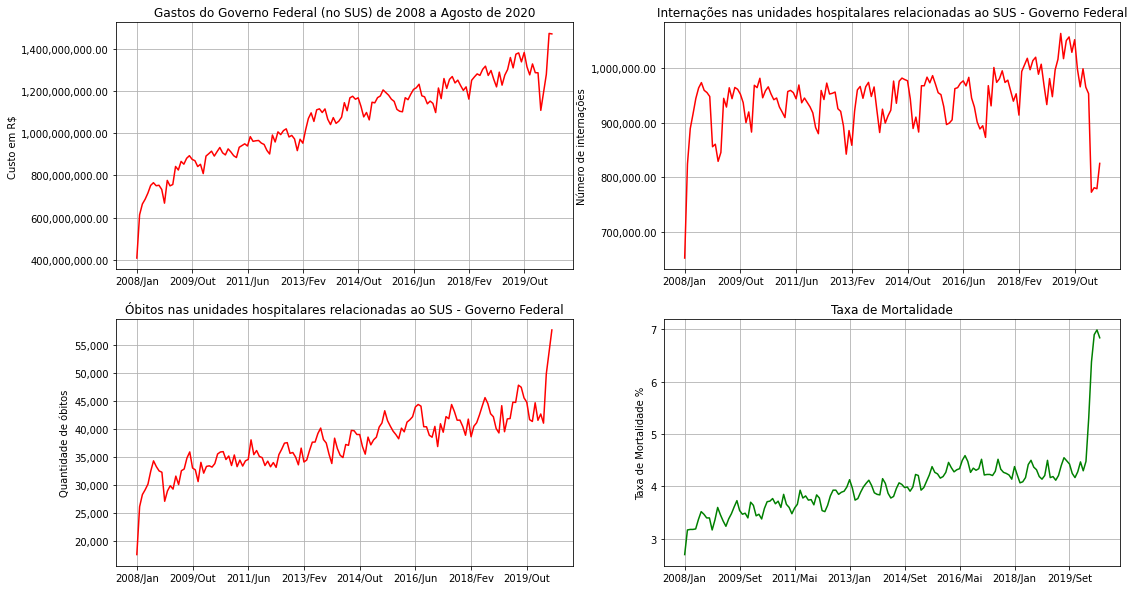

In [ ]:
###Plotagem dos 4 gráficos

plt.figure(figsize=(18, 10))
s1 = plt.subplot(2, 2, 1)
#Gastos Total do governo federal
s1 = gastos_total.T['Total'].plot( grid= (True), color = 'red')
plt.title('Gastos do Governo Federal (no SUS) de 2008 a Agosto de 2020')
s1.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylabel('Custo em R$')


#Número de óbitos
s3 = plt.subplot(2, 2, 3)
s3.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
s3 = óbitos_Total.T['Total'].plot(grid= (True), color ='red')
plt.title('Óbitos nas unidades hospitalares relacionadas ao SUS - Governo Federal')
plt.ylabel('Quantidade de óbitos')



#Internações no Brasil

s2 = plt.subplot(2, 2, 2)
s2 = internações_Total.T['Total'].plot(grid = (True), color="red")
plt.title('Internações nas unidades hospitalares relacionadas ao SUS - Governo Federal')
s2.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))
plt.ylabel('Número de internações')

#Taxa de mortalidade no Brasil

s4 = plt.subplot(2, 2, 4)
s4 = tm_total.T['Total'].plot(grid= (True), color = 'green')
plt.title('Taxa de Mortalidade')
plt.ylabel('Taxa de Mortalidade %')



##Análise da taxa de mortalidade média por Unidade Federativa

In [ ]:
TaxaMortalidade = pd.read_csv('/content/drive/MyDrive/Helano_Wilson_Projeto1_bootcampAlura/Taxa de mortalidade por UF.csv', encoding = "ISO-8859-1",
                    skiprows=3, sep=";", skipfooter = 7,
                    thousands=".", decimal =',')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
TaxaMortalidade = TaxaMortalidade.sort_values(by='Total', ascending= False)
TaxaMortalidade.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
18,33 Rio de Janeiro,3.25,3.83,4.32,4.32,4.94,4.49,4.60,4.73,4.90,4.87,4.02,4.81,4.90,5.13,4.60,4.24,4.48,4.61,5.01,5.24,4.78,4.65,5.34,4.65,5.32,5.59,5.14,5.28,5.12,5.26,5.40,5.68,5.67,5.97,5.58,6.04,6.15,5.52,5.84,...,6.63,6.87,6.70,6.40,6.42,6.60,6.60,6.82,6.98,6.79,6.28,6.93,6.82,7.26,6.82,6.88,6.56,6.47,6.92,7.04,6.43,7.13,6.52,6.87,7.43,7.09,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,10.88,10.62,9.34,6.20
19,35 São Paulo,3.80,4.40,4.43,4.37,4.57,4.70,5.00,4.92,4.64,4.73,4.36,4.64,4.75,4.56,4.40,4.32,4.40,4.61,4.97,5.01,4.74,4.69,4.46,4.57,4.97,4.79,4.48,4.57,4.40,4.91,4.99,4.84,5.02,4.71,4.94,4.60,5.04,4.68,4.51,...,4.97,5.33,5.10,5.06,5.15,4.87,4.99,5.24,4.89,4.67,4.68,4.87,5.47,5.43,5.08,5.08,4.81,4.92,5.12,5.37,4.90,4.75,4.69,4.87,5.23,5.59,5.20,5.18,4.89,4.77,5.03,5.25,5.05,5.22,6.86,7.68,8.00,8.21,7.56,4.96
22,43 Rio Grande do Sul,3.39,4.24,4.19,4.00,3.94,4.88,4.53,4.43,4.51,4.37,4.06,4.38,4.70,4.27,4.13,3.99,4.33,4.57,4.65,5.26,4.63,4.47,4.65,4.30,4.55,4.91,4.37,4.19,4.36,4.63,4.55,4.89,5.10,4.81,4.68,4.47,4.30,4.50,4.10,...,5.18,5.50,5.16,5.25,5.13,5.09,4.73,5.31,5.04,4.51,4.66,4.82,5.36,5.82,5.96,5.75,5.27,5.16,4.90,5.43,5.09,4.87,4.79,4.77,4.92,5.52,5.86,5.72,5.23,5.03,5.00,5.18,4.91,4.90,5.52,6.22,6.30,7.27,7.40,4.85
16,31 Minas Gerais,3.33,3.78,3.88,3.66,3.79,4.11,4.31,4.27,4.11,4.01,3.90,3.92,4.34,4.16,4.12,3.93,4.12,4.21,4.32,4.51,4.20,4.10,4.35,4.16,4.44,4.30,3.89,3.97,4.08,4.45,4.55,4.39,4.33,4.35,4.51,4.21,4.46,4.34,4.17,...,4.67,5.23,5.00,4.90,4.63,4.73,4.63,4.72,4.48,4.40,4.50,4.50,4.83,4.66,4.72,4.71,4.62,4.38,4.52,4.73,4.42,4.53,4.39,4.49,4.73,4.91,4.94,4.84,4.69,4.48,4.51,4.74,4.54,4.79,5.28,5.38,5.74,6.17,6.62,4.44
11,25 Paraíba,2.62,2.98,2.70,2.84,2.53,2.71,2.86,2.92,2.84,2.79,2.92,3.37,3.14,3.29,3.03,2.96,3.22,3.85,3.86,3.50,3.50,3.19,3.43,3.43,3.86,3.48,3.53,3.48,3.00,3.23,3.31,3.46,3.53,3.48,3.69,3.69,4.05,3.17,3.35,...,4.46,4.81,4.66,4.43,4.31,5.05,4.51,5.08,4.70,4.60,4.62,4.28,5.09,5.12,4.74,4.60,4.75,4.83,4.20,5.10,4.80,4.72,4.61,5.05,5.23,5.00,5.14,4.95,4.74,4.92,5.24,5.04,5.13,5.00,5.89,7.20,6.74,9.81,8.22,4.12


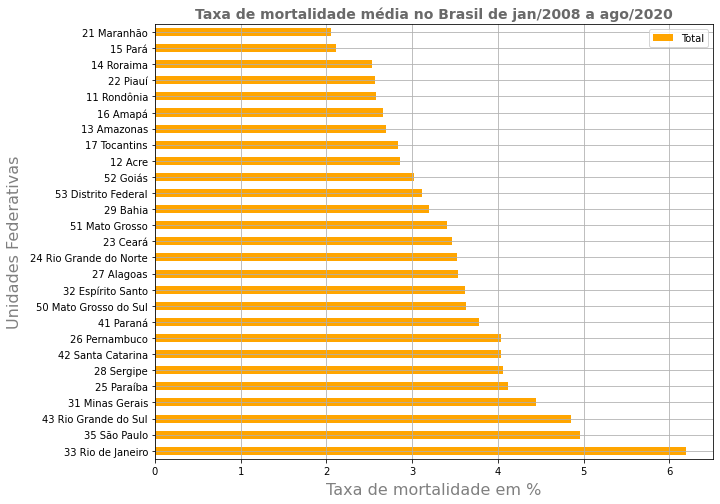

In [ ]:
ax =TaxaMortalidade.plot(x = 'Unidade da Federação', y ="Total", kind ="barh", figsize=(10,8), grid= (True), color = ('orange'))
plt.title('Taxa de mortalidade média no Brasil de jan/2008 a ago/2020',
         fontsize = 14,color ='dimgrey', fontweight = 'bold')
plt.ylabel('Unidades Federativas', color = 'grey', labelpad = 8, fontsize = 16)
plt.xlabel('Taxa de mortalidade em %', color = 'grey', labelpad = 6, fontsize = 16)
plt.show()

###Se a taxa de mortalidade nacional está crescendo, deve-se analisar quais fatores justificam e contribuem para isso. 
###Um dos parâmetros mundial para medir qualidade de vida, índices de saúde, renda e educação, é o IDH. Existe relação entre a taxa de mortalidade e o IDH (Indice de Desenvolvimento Humano) dos estados e regiões?
### **HIPÓTESE 1 - Taxa de Mortalidade está ligada ao IDH das UF?**


##HIPÓTESE 1 
### Com os dados de IDH de acordo com o Programa das Nações Unidas para o Desenvolvimento é possível analisar a correlação entre Taxa de Mortalidade e IDH;
###Devemos analisar os IDH de cada região, estados, e verificar ligação com  a taxa de mortalidade

##Inserindo dados de IDH 

In [ ]:
#Criação de dicionário com dados de IDH 
TaxaMortalidade['Unidade da Federação'].unique()


array(['33 Rio de Janeiro', '35 São Paulo', '43 Rio Grande do Sul',
       '31 Minas Gerais', '25 Paraíba', '28 Sergipe', '42 Santa Catarina',
       '26 Pernambuco', '41 Paraná', '50 Mato Grosso do Sul',
       '32 Espírito Santo', '27 Alagoas', '24 Rio Grande do Norte',
       '23 Ceará', '51 Mato Grosso', '29 Bahia', '53 Distrito Federal',
       '52 Goiás', '12 Acre', '17 Tocantins', '13 Amazonas', '16 Amapá',
       '11 Rondônia', '22 Piauí', '14 Roraima', '15 Pará', '21 Maranhão'],
      dtype=object)

In [ ]:
IDH = {'11 Rondônia': 0.725, '12 Acre': 0.719, '13 Amazonas': 0.733, '14 Roraima':0.752, '15 Pará':0.698,
       '16 Amapá':0.740, '17 Tocantins':0.743,'21 Maranhão': 0.687, '22 Piauí': 0.697, '23 Ceará': 0.735,
       '24 Rio Grande do Norte': 0.731, '25 Paraíba': 0.722, '26 Pernambuco': 0.727, '27 Alagoas': 0.683,
       '28 Sergipe': 0.702, '29 Bahia': 0.714, '31 Minas Gerais': 0.787, '32 Espírito Santo': 0.778,
       '33 Rio de Janeiro': 0.787, '35 São Paulo': 0.826, '41 Paraná': 0.796, '42 Santa Catarina': 0.808,
       '43 Rio Grande do Sul': 0.792, '50 Mato Grosso do Sul': 0.766, '51 Mato Grosso': 0.772,
       '52 Goiás': 0.769, '53 Distrito Federal': 0.850}
TaxaMortalidade['IDH']= TaxaMortalidade['Unidade da Federação'].map(IDH)
TaxaMortalidade.head()

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,IDH
18,33 Rio de Janeiro,3.25,3.83,4.32,4.32,4.94,4.49,4.60,4.73,4.90,4.87,4.02,4.81,4.90,5.13,4.60,4.24,4.48,4.61,5.01,5.24,4.78,4.65,5.34,4.65,5.32,5.59,5.14,5.28,5.12,5.26,5.40,5.68,5.67,5.97,5.58,6.04,6.15,5.52,5.84,...,6.87,6.70,6.40,6.42,6.60,6.60,6.82,6.98,6.79,6.28,6.93,6.82,7.26,6.82,6.88,6.56,6.47,6.92,7.04,6.43,7.13,6.52,6.87,7.43,7.09,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,10.88,10.62,9.34,6.20,0.79
19,35 São Paulo,3.80,4.40,4.43,4.37,4.57,4.70,5.00,4.92,4.64,4.73,4.36,4.64,4.75,4.56,4.40,4.32,4.40,4.61,4.97,5.01,4.74,4.69,4.46,4.57,4.97,4.79,4.48,4.57,4.40,4.91,4.99,4.84,5.02,4.71,4.94,4.60,5.04,4.68,4.51,...,5.33,5.10,5.06,5.15,4.87,4.99,5.24,4.89,4.67,4.68,4.87,5.47,5.43,5.08,5.08,4.81,4.92,5.12,5.37,4.90,4.75,4.69,4.87,5.23,5.59,5.20,5.18,4.89,4.77,5.03,5.25,5.05,5.22,6.86,7.68,8.00,8.21,7.56,4.96,0.83
22,43 Rio Grande do Sul,3.39,4.24,4.19,4.00,3.94,4.88,4.53,4.43,4.51,4.37,4.06,4.38,4.70,4.27,4.13,3.99,4.33,4.57,4.65,5.26,4.63,4.47,4.65,4.30,4.55,4.91,4.37,4.19,4.36,4.63,4.55,4.89,5.10,4.81,4.68,4.47,4.30,4.50,4.10,...,5.50,5.16,5.25,5.13,5.09,4.73,5.31,5.04,4.51,4.66,4.82,5.36,5.82,5.96,5.75,5.27,5.16,4.90,5.43,5.09,4.87,4.79,4.77,4.92,5.52,5.86,5.72,5.23,5.03,5.00,5.18,4.91,4.90,5.52,6.22,6.30,7.27,7.40,4.85,0.79
16,31 Minas Gerais,3.33,3.78,3.88,3.66,3.79,4.11,4.31,4.27,4.11,4.01,3.90,3.92,4.34,4.16,4.12,3.93,4.12,4.21,4.32,4.51,4.20,4.10,4.35,4.16,4.44,4.30,3.89,3.97,4.08,4.45,4.55,4.39,4.33,4.35,4.51,4.21,4.46,4.34,4.17,...,5.23,5.00,4.90,4.63,4.73,4.63,4.72,4.48,4.40,4.50,4.50,4.83,4.66,4.72,4.71,4.62,4.38,4.52,4.73,4.42,4.53,4.39,4.49,4.73,4.91,4.94,4.84,4.69,4.48,4.51,4.74,4.54,4.79,5.28,5.38,5.74,6.17,6.62,4.44,0.79
11,25 Paraíba,2.62,2.98,2.70,2.84,2.53,2.71,2.86,2.92,2.84,2.79,2.92,3.37,3.14,3.29,3.03,2.96,3.22,3.85,3.86,3.50,3.50,3.19,3.43,3.43,3.86,3.48,3.53,3.48,3.00,3.23,3.31,3.46,3.53,3.48,3.69,3.69,4.05,3.17,3.35,...,4.81,4.66,4.43,4.31,5.05,4.51,5.08,4.70,4.60,4.62,4.28,5.09,5.12,4.74,4.60,4.75,4.83,4.20,5.10,4.80,4.72,4.61,5.05,5.23,5.00,5.14,4.95,4.74,4.92,5.24,5.04,5.13,5.00,5.89,7.20,6.74,9.81,8.22,4.12,0.72


In [ ]:
#Criação de uma nova coluna de acordo com as IDH e dicionário obtido
TaxaMortalidade['IDH_Classificação']= TaxaMortalidade['IDH']
TaxaMortalidade['IDH_Classificação'].sort_values(ascending=False)



26   0.85
19   0.83
21   0.81
20   0.80
22   0.79
18   0.79
16   0.79
17   0.78
24   0.77
25   0.77
23   0.77
3    0.75
6    0.74
5    0.74
9    0.73
2    0.73
10   0.73
12   0.73
0    0.72
11   0.72
1    0.72
15   0.71
14   0.70
4    0.70
8    0.70
7    0.69
13   0.68
Name: IDH_Classificação, dtype: float64

In [ ]:
#Dividindo as UF de acordo com os critérios do Programa das Nações Unidas para o Desenvolvimento
classes = [0.354, 0.554, 0.699, 0.799, 1.000]
labels = ['IDH_Baixo', 'IDH_Médio', 'IDH_Alto', 'IDH_Muito alto']
TaxaMortalidade['IDH_Classes'] = pd.cut(TaxaMortalidade['IDH'], classes, labels = labels)
TaxaMortalidade['IDH_Classes'].sort_values()


7          IDH_Médio
8          IDH_Médio
13         IDH_Médio
4          IDH_Médio
3           IDH_Alto
0           IDH_Alto
5           IDH_Alto
2           IDH_Alto
6           IDH_Alto
1           IDH_Alto
25          IDH_Alto
15          IDH_Alto
24          IDH_Alto
18          IDH_Alto
17          IDH_Alto
23          IDH_Alto
20          IDH_Alto
12          IDH_Alto
14          IDH_Alto
11          IDH_Alto
16          IDH_Alto
22          IDH_Alto
10          IDH_Alto
9           IDH_Alto
26    IDH_Muito alto
21    IDH_Muito alto
19    IDH_Muito alto
Name: IDH_Classes, dtype: category
Categories (4, object): ['IDH_Baixo' < 'IDH_Médio' < 'IDH_Alto' < 'IDH_Muito alto']

In [ ]:
#Criação de dicionário para divisão das UF's em Regiões 
TaxaMortalidade['Região']=TaxaMortalidade['Unidade da Federação'].str[0]
Regiões = {'1': 'Norte', '2': 'Nordeste','3': 'Sudeste', '4': 'Sul', '5': 'Centro-Oeste'}
TaxaMortalidade['Região']= TaxaMortalidade['Região'].replace(Regiões)
TaxaMortalidade.head(3)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,IDH,IDH_Classificação,IDH_Classes,Região
18,33 Rio de Janeiro,3.25,3.83,4.32,4.32,4.94,4.49,4.60,4.73,4.90,4.87,4.02,4.81,4.90,5.13,4.60,4.24,4.48,4.61,5.01,5.24,4.78,4.65,5.34,4.65,5.32,5.59,5.14,5.28,5.12,5.26,5.40,5.68,5.67,5.97,5.58,6.04,6.15,5.52,5.84,...,6.42,6.60,6.60,6.82,6.98,6.79,6.28,6.93,6.82,7.26,6.82,6.88,6.56,6.47,6.92,7.04,6.43,7.13,6.52,6.87,7.43,7.09,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,10.88,10.62,9.34,6.20,0.79,0.79,IDH_Alto,Sudeste
19,35 São Paulo,3.80,4.40,4.43,4.37,4.57,4.70,5.00,4.92,4.64,4.73,4.36,4.64,4.75,4.56,4.40,4.32,4.40,4.61,4.97,5.01,4.74,4.69,4.46,4.57,4.97,4.79,4.48,4.57,4.40,4.91,4.99,4.84,5.02,4.71,4.94,4.60,5.04,4.68,4.51,...,5.15,4.87,4.99,5.24,4.89,4.67,4.68,4.87,5.47,5.43,5.08,5.08,4.81,4.92,5.12,5.37,4.90,4.75,4.69,4.87,5.23,5.59,5.20,5.18,4.89,4.77,5.03,5.25,5.05,5.22,6.86,7.68,8.00,8.21,7.56,4.96,0.83,0.83,IDH_Muito alto,Sudeste
22,43 Rio Grande do Sul,3.39,4.24,4.19,4.00,3.94,4.88,4.53,4.43,4.51,4.37,4.06,4.38,4.70,4.27,4.13,3.99,4.33,4.57,4.65,5.26,4.63,4.47,4.65,4.30,4.55,4.91,4.37,4.19,4.36,4.63,4.55,4.89,5.10,4.81,4.68,4.47,4.30,4.50,4.10,...,5.13,5.09,4.73,5.31,5.04,4.51,4.66,4.82,5.36,5.82,5.96,5.75,5.27,5.16,4.90,5.43,5.09,4.87,4.79,4.77,4.92,5.52,5.86,5.72,5.23,5.03,5.00,5.18,4.91,4.90,5.52,6.22,6.30,7.27,7.40,4.85,0.79,0.79,IDH_Alto,Sul


##Análise Gráfica da HIPÓTESE 1

In [ ]:
dados_ordenado = TaxaMortalidade.sort_values(by='IDH', ascending= False)
dados_ordenado.head(2)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,IDH,IDH_Classificação,IDH_Classes,Região
26,53 Distrito Federal,4.45,3.34,2.75,3.27,2.38,2.94,3.01,2.79,3.25,3.00,2.75,2.50,3.16,3.18,2.93,2.44,2.66,2.97,2.50,3.01,2.65,2.79,2.44,2.34,2.98,3.26,2.46,2.48,2.41,2.39,2.53,2.68,3.03,2.44,2.67,2.40,3.71,3.11,2.95,...,3.31,3.30,2.98,3.24,3.11,3.16,3.17,3.29,3.22,3.23,3.19,2.70,2.65,3.32,2.63,3.11,2.70,2.67,2.74,2.77,3.22,2.96,3.41,2.78,2.63,2.88,2.84,3.38,2.86,3.09,3.34,3.23,4.47,5.33,5.95,3.11,0.85,0.85,IDH_Muito alto,Centro-Oeste
19,35 São Paulo,3.80,4.40,4.43,4.37,4.57,4.70,5.00,4.92,4.64,4.73,4.36,4.64,4.75,4.56,4.40,4.32,4.40,4.61,4.97,5.01,4.74,4.69,4.46,4.57,4.97,4.79,4.48,4.57,4.40,4.91,4.99,4.84,5.02,4.71,4.94,4.60,5.04,4.68,4.51,...,5.15,4.87,4.99,5.24,4.89,4.67,4.68,4.87,5.47,5.43,5.08,5.08,4.81,4.92,5.12,5.37,4.90,4.75,4.69,4.87,5.23,5.59,5.20,5.18,4.89,4.77,5.03,5.25,5.05,5.22,6.86,7.68,8.00,8.21,7.56,4.96,0.83,0.83,IDH_Muito alto,Sudeste


###Valores de IDH por UF's.

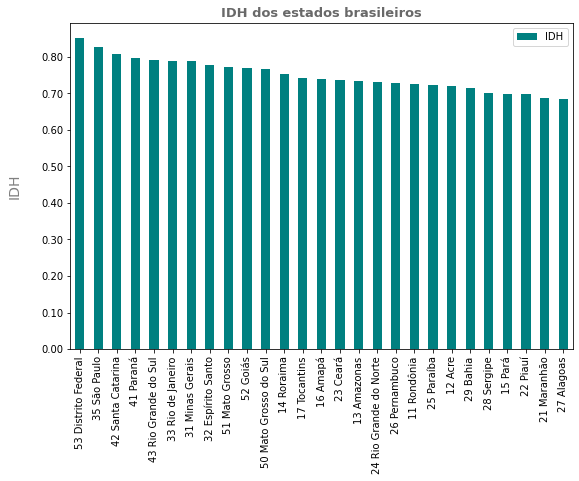

In [ ]:
ax = dados_ordenado.plot(x = 'Unidade da Federação', y ="IDH", kind ="bar", figsize=(9,6), color = 'teal')
plt.title('IDH dos estados brasileiros', fontsize = 13, color ='dimgrey', fontweight = 'bold')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}",))
plt.ylabel('IDH', color = 'grey', labelpad = 20, fontsize = 14)
plt.xlabel('')
plt.legend()
plt.show()


###Graficamente fica nítido a relação entre IDH e Taxa de Mortalidade. Quanto maior o IDH, maior é a taxa de mortalidade. Faz sentido? Estados com melhores condições de vida possuem maior taxa de mortalidade no SUS?

Text(0.5, 0, '')

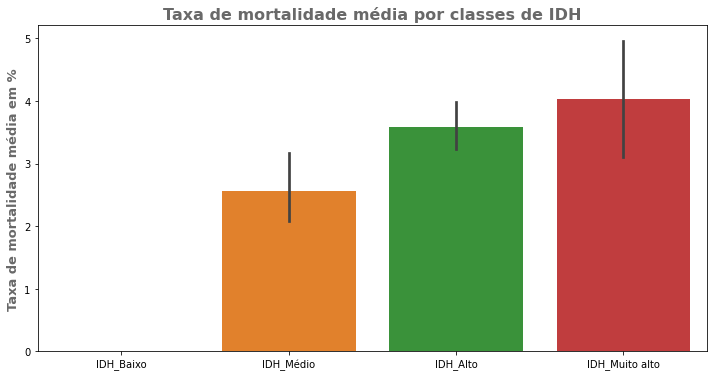

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x = "IDH_Classes", y="Total", data= TaxaMortalidade)
plt.title("Taxa de mortalidade média por classes de IDH", fontsize = 16, color ='dimgrey', fontweight = 'bold')
plt.ylabel('Taxa de mortalidade média em %', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('')


###Analisando mais um gráfico, dessa vez as regiões do país e a Taxa de Mortalidade. A região com maior taxa é a Sudeste, seguidas de Sul, Nordeste, Centro-Oeste e Norte. 

Text(0.5, 0, '')

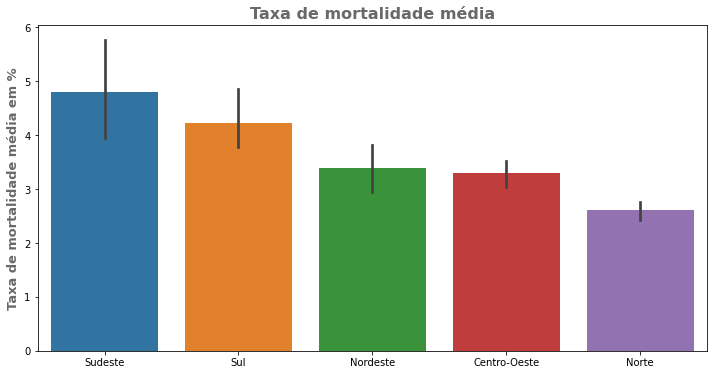

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x = "Região", y="Total", data= TaxaMortalidade)
plt.title("Taxa de mortalidade média", fontsize = 16, color ='dimgrey', fontweight = 'bold')
plt.ylabel('Taxa de mortalidade média em %', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('')


### Observa-se, no gráfico abaixo, a classe "IDH Alto" em todas as regiões, portanto, os locais com maiores taxas de mortalidade possuem outro fator a ser pesquisado. 

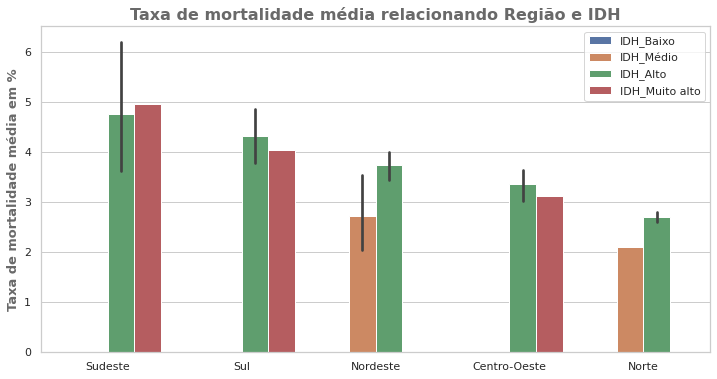

In [ ]:
#Escolha de paleta de cores e estilo do gráfico
sns.set(style="whitegrid")
cmap = sns.color_palette("Blues")
fig, ax = plt.subplots(figsize=(12,6))
ax = sns.barplot(x = "Região", y= "Total", hue="IDH_Classes", data= TaxaMortalidade)
plt.title("Taxa de mortalidade média relacionando Região e IDH", fontsize = 16, color ='dimgrey', fontweight = 'bold')
plt.ylabel('Taxa de mortalidade média em %', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('')
plt.legend(loc= 0)

##  Verifica-se um aumento da taxa de mortalidade com o aumento do IDH. Teoricamente essa afirmação não faz sentido. Acredita-se que o IDH alto indica melhores condições de vida e, portanto, deveria ter as menores taxas de mortalidade. 
##  Aqui entram fatores a serem questionados: Deveria então ser analisadas especificadamente as causas das mortes? IDH mais altos, significa mais riscos de transito? No entanto, o Brasil vem diminuindo os números de mortes no transito, segundo dados do governo: https://www.gov.br/pt-br/noticias/transito-e-transportes/2020/09/brasil-registra-queda-em-numero-de-mortes-no-transito

##  Cidades mais populosas e com maiores indices de violencia, justificaria? Porém, o Brasil tem conseguido diminuir tambem os indices de violencia. Em 2019, inclusive foi um dos anos de maior queda no indice de mortes violentas(https://g1.globo.com/monitor-da-violencia/noticia/2020/04/29/apos-ano-de-queda-recorde-no-de-assassinatos-sobe-8percent-no-brasil-nos-dois-primeiros-meses-de-2020.ghtml). Que outra análise teria mais sentido? 



### **HIPÓTESE 2 - Estamos envelhecendo e tornando o Brasil um país de idosos?**

###Taxa de mortalidade e Porcentagem de Idosos, existe correlação?



##As doenças isquêmicas do coração foram a principal causa de morte no Brasil em 2019. É o que apresenta o relatório GBD (Global Burden of Diseases, Injuries, and Risk Factors Study), divulgado no periódico The Lancet. https://www.thelancet.com/gbd

###Trabalhando a Hipótese 2 - Inserindo coluna com variável Idosos. 

In [ ]:
#Dados da porcentagem de idosos na população das UF's de acordo com o IBGE de 2019 - Criando dicionário.
Idosos = {'11 Rondônia': 9.9, '12 Acre': 7.9, '13 Amazonas': 7.4, '14 Roraima':4.3, '15 Pará':9.1,
       '16 Amapá':6.9, '17 Tocantins':10.7,'21 Maranhão': 10.4, '22 Piauí': 12.8, '23 Ceará': 12.8,
       '24 Rio Grande do Norte': 13.7, '25 Paraíba': 13.8, '26 Pernambuco': 13.0, '27 Alagoas':11.0,
       '28 Sergipe': 11.3, '29 Bahia': 13.2, '31 Minas Gerais': 16.1, '32 Espírito Santo': 14.5,
       '33 Rio de Janeiro': 17.2, '35 São Paulo': 15.7, '41 Paraná': 15.4, '42 Santa Catarina': 15.0,
       '43 Rio Grande do Sul': 18.7, '50 Mato Grosso do Sul': 13.1, '51 Mato Grosso': 11.1,
       '52 Goiás': 12.2, '53 Distrito Federal': 11.3}      

In [ ]:
#Mapeando a coluna Idosos e inserindo valores de porcentagem de idosos.
TaxaMortalidade['Idosos']= TaxaMortalidade['Unidade da Federação'].map(Idosos)
TaxaMortalidade.head(2)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,IDH,IDH_Classificação,IDH_Classes,Região,Idosos
18,33 Rio de Janeiro,3.25,3.83,4.32,4.32,4.94,4.49,4.60,4.73,4.90,4.87,4.02,4.81,4.90,5.13,4.60,4.24,4.48,4.61,5.01,5.24,4.78,4.65,5.34,4.65,5.32,5.59,5.14,5.28,5.12,5.26,5.40,5.68,5.67,5.97,5.58,6.04,6.15,5.52,5.84,...,6.60,6.60,6.82,6.98,6.79,6.28,6.93,6.82,7.26,6.82,6.88,6.56,6.47,6.92,7.04,6.43,7.13,6.52,6.87,7.43,7.09,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,10.88,10.62,9.34,6.20,0.79,0.79,IDH_Alto,Sudeste,17.20
19,35 São Paulo,3.80,4.40,4.43,4.37,4.57,4.70,5.00,4.92,4.64,4.73,4.36,4.64,4.75,4.56,4.40,4.32,4.40,4.61,4.97,5.01,4.74,4.69,4.46,4.57,4.97,4.79,4.48,4.57,4.40,4.91,4.99,4.84,5.02,4.71,4.94,4.60,5.04,4.68,4.51,...,4.87,4.99,5.24,4.89,4.67,4.68,4.87,5.47,5.43,5.08,5.08,4.81,4.92,5.12,5.37,4.90,4.75,4.69,4.87,5.23,5.59,5.20,5.18,4.89,4.77,5.03,5.25,5.05,5.22,6.86,7.68,8.00,8.21,7.56,4.96,0.83,0.83,IDH_Muito alto,Sudeste,15.70


In [ ]:
TaxaMortalidade_organizado = TaxaMortalidade.sort_values("Idosos", ascending=False)
TaxaMortalidade_organizado.head(2)

,Unidade da Federação,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,...,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,IDH,IDH_Classificação,IDH_Classes,Região,Idosos
22,43 Rio Grande do Sul,3.39,4.24,4.19,4.00,3.94,4.88,4.53,4.43,4.51,4.37,4.06,4.38,4.70,4.27,4.13,3.99,4.33,4.57,4.65,5.26,4.63,4.47,4.65,4.30,4.55,4.91,4.37,4.19,4.36,4.63,4.55,4.89,5.10,4.81,4.68,4.47,4.30,4.50,4.10,...,5.09,4.73,5.31,5.04,4.51,4.66,4.82,5.36,5.82,5.96,5.75,5.27,5.16,4.90,5.43,5.09,4.87,4.79,4.77,4.92,5.52,5.86,5.72,5.23,5.03,5.00,5.18,4.91,4.90,5.52,6.22,6.30,7.27,7.40,4.85,0.79,0.79,IDH_Alto,Sul,18.70
18,33 Rio de Janeiro,3.25,3.83,4.32,4.32,4.94,4.49,4.60,4.73,4.90,4.87,4.02,4.81,4.90,5.13,4.60,4.24,4.48,4.61,5.01,5.24,4.78,4.65,5.34,4.65,5.32,5.59,5.14,5.28,5.12,5.26,5.40,5.68,5.67,5.97,5.58,6.04,6.15,5.52,5.84,...,6.60,6.60,6.82,6.98,6.79,6.28,6.93,6.82,7.26,6.82,6.88,6.56,6.47,6.92,7.04,6.43,7.13,6.52,6.87,7.43,7.09,6.63,6.53,6.62,6.48,6.77,7.19,6.59,7.11,8.27,11.01,10.88,10.62,9.34,6.20,0.79,0.79,IDH_Alto,Sudeste,17.20


Text(0.5, 0, '')

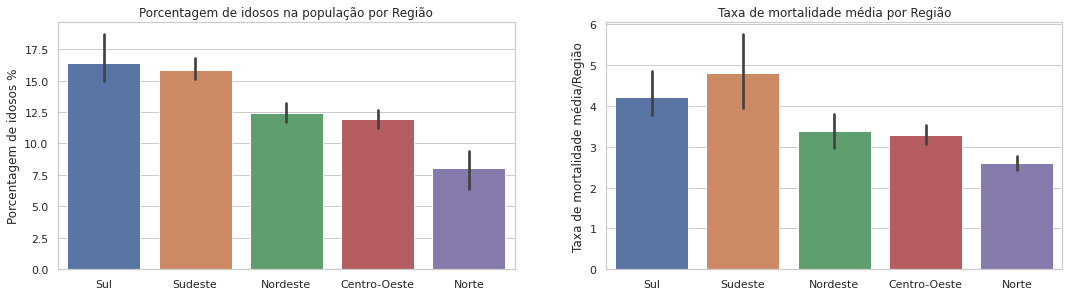

In [ ]:
plt.figure(figsize=(18, 10))

# Plotando gráficos comparativos. Observa-se correlação positiva entre o numero de idosos e a taxa de mortalidade.

s1 = plt.subplot(2, 2, 1)

s1 = sns.barplot(x = "Região", y="Idosos", data= TaxaMortalidade_organizado)
s1.title.set_text("Porcentagem de idosos na população por Região")
plt.ylabel('Porcentagem de idosos %')
plt.xlabel('')

s1 = plt.subplot(2, 2, 2)
s2 = sns.barplot(x = "Região", y="Total", data= TaxaMortalidade_organizado)
s2.title.set_text("Taxa de mortalidade média por Região")
plt.ylabel('Taxa de mortalidade média/Região')
plt.xlabel('')

### Verifica-se no gráfico acima a similaridade entre as duas distribuições. A proporção de idosos na população está ligada diretamente a taxa de mortalidade. 

Text(0.5, 0, 'Número de idosos na população em %')

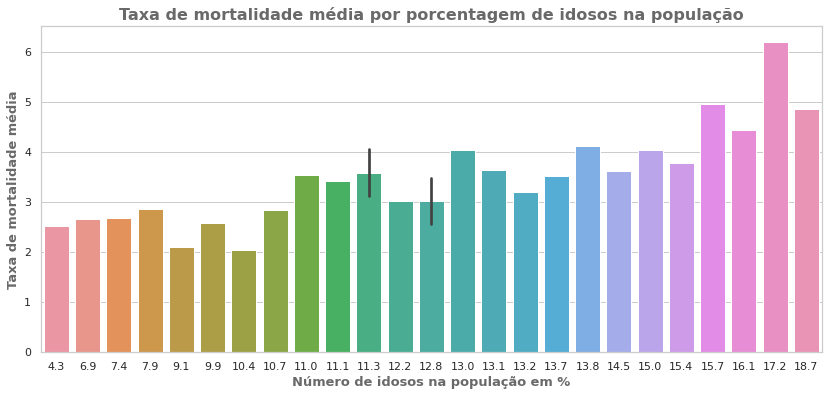

In [ ]:
#Análise da  Taxa de mortalidade em função da proporção de idosos na população
fig, ax = plt.subplots(figsize=(14,6))
ax = sns.barplot(x = "Idosos", y="Total" , data= TaxaMortalidade_organizado)
plt.title("Taxa de mortalidade média por porcentagem de idosos na população", fontsize = 16, color ='dimgrey', fontweight = 'bold')
plt.ylabel('Taxa de mortalidade média', fontsize = 13, color ='dimgrey', fontweight = 'bold')
plt.xlabel('Número de idosos na população em %', fontsize = 13, color ='dimgrey', fontweight = 'bold')



###Verifica-se uma tendência de correlação positiva entre as variáveis Idosos x Taxa de mortalidade média. Quanto maior a proporção de idosos na população, maior a taxa de mortalidade.

In [ ]:
TaxaMortalidade_organizado['Total'].corr(TaxaMortalidade_organizado['Idosos'])

0.7845276880290861

## CONCLUSÃO
###A população brasileira está envelhecendo. No entanto, estamos cuidando mal dos idosos. Indices de desemprego nessa faixa etária estão aumentando. Sem renda, sem boa qualidade de vida, muitos idosos ficam em espostos a doenças psiquicas, doenças vasculares, e muitos estão abandonados pela familia. Cabe um estudo mais aprofundado sobre as condições de vida dos idosos. 
 

### **HIPÓTESE 1 - Taxa de Mortalidade está ligada ao IDH das UF?**
### Sim. Percebe-se, mesmo que de forma surpreendente, que locais de maiores IDH possuem maior taxa de mortalidade. Mas, esse resultado é enganoso. Na verdade, o que ocorre é que os estados com mais idosos na população são diretamente ligados ao de maior IDH. Ora, um dos indices para o IDH é justamente a expectativa de vida...logo...

### **HIPÓTESE 2 - Estamos envelhecendo e tornando o Brasil um país de idosos?**
### Sim. A população brasileira está envelhecendo, com maior expectativa de vida. Porém, não acompanhamos esse fato em melhores condições e programas do governo para os idosos. 

###O projeto, superficialmente, buscou encontrar respostas para o aumento da taxa de mortalidade. Existe um mundo de informaçoes que poderiam ser acrescentadas nesse projeto. O debate pode e deve ser muito mais amplo. 